# Deep Learning Project: A Midtable Premier League Table Analysis
### By: Alan Wojciechowski

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The top division of English soccer is one of the most watched and respected leagues in the world. Formalized and rebranded as the Premier League in 1992, the first season featured 22 teams in a promotion relegation structure. Every team plays against each other twice, both at home and away. A point system is used for rankning which consists of three points for a win, one point for a draw, and zero points for a loss. The team with the most points at the end of the season earns the Premier League title, while the bottom three teams are relegated to a lower division. Additionally, placing in the  top four holds significance because it is a way for teams to qualify for the Union of European Football Associations(UEFA) Champions League. This is the highest European club competition that invites the best club teams from all European countries. Teams strive to qualify in order to attract new fans, gain more money, and prove their mettle against other top European clubs.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I chose to examine data from the halfway point in the season to predict three classifications: winner, top four, and bottom three. I wanted to look at the halfway mark of the season because I thought it was a good point in time to test where a team will end up up by the end of the season. Also, fixture congestion towards the ends of the calendar year is a big point for managers and pundits to make as to why their teams under/over perform. Fans especially like to comment about difficult mid season schedules as reasons why their team lost out on potential points and underperformed. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For my data, I used https://www.premierleague.com/tables to record data at the 19th matchweek for each season. I chose the 19th matchweek because that is halfway through the 38 match week cycle. Also, I only gathered data from the 1995/96 season onwards because that is the first season the league reduced the number of teams to 20 instead of 22. One setback I stumbled upon was an inconsistency found especially in the earlier seasons. Even though the match week was halfway in the season, some teams played a different amount of teams that others. I thought about looking at each season and finding each team at the point where they played 18 games, but that would cause a significant amount of work given the slow update of the table and trying to keep track of which teams I recorded. Thus, I decided to just take the results at match week 18, since that would be a snap shot of the table at the halfway point.

I manually copy, pasted, and edited the halfway table for each relevant season, while also recording which team won, got top four, or was relegated. The features included in the dataset are wins, draws, losses, goals for, goals against, goal difference, points, and form from the past five games played. The form was encoded as a number between 0 and 5 for three features: WF(win form), DF(draw form), and LF(loss form). For each file (winner.csv, topfour.csv, relegation.csv) a 1 at the end denotes the desired placement and a -1 denotes otherwise. I ended up with 440 teams to test my data on.


Included with the notebook are 

- datasets: `winner.csv`, `top4.csv`, and `relegation.csv`

- helper file: `util.py`

In [1]:
import autograd.numpy as np
from util import *

winner = np.loadtxt('winner.csv',skiprows=1,delimiter=',')
top4 = np.loadtxt('top4.csv',skiprows=1,delimiter=',')
relegation = np.loadtxt('relegation.csv',skiprows=1,delimiter=',')

In [2]:
def softmax(w):
    return np.sum([np.log(1 + np.exp(-y[p]*(w[0] + np.dot(w[1:].T,x[p])))) for p in range(0,len(y))])

def find_count(w):
    count=0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        count += (np.sign(w[0] + sum([a*b for a,b in zip(w[1:],x_p)])) - y_p)**2
    return 0.25*count

def find_all_counts(weight_history):
    count_hist = []
    for p in range(0,len(weight_history)):
        count_hist.append(find_count(weight_history[p]))
    return count_hist

#### Results for winner:

In [3]:
x = winner[:,:-1]
y = winner[:,-1:]

In [4]:
w=np.asarray([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
weights = gradient_descent(g=softmax,alpha = .00001 ,max_its = 200,w = w,beta=0.75,version="unnormalized")

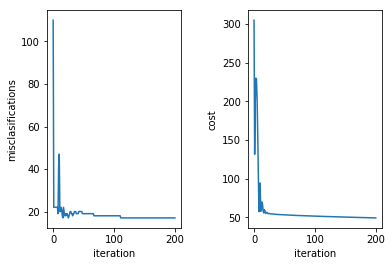

Missclassifications: [ 17.]


In [5]:
costs = find_softmax_costs(weights,g=softmax)
counts = find_all_counts(weights)
plot_two(counts,costs)
print("Missclassifications: {}".format(min(counts)))

#### Results for top four:

In [6]:
x = top4[:,:-1]
y = top4[:,-1:]

In [7]:
w=np.asarray([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
weights = gradient_descent(g=softmax,alpha = .00001 ,max_its = 300,w = w,beta=0.75,version="unnormalized")

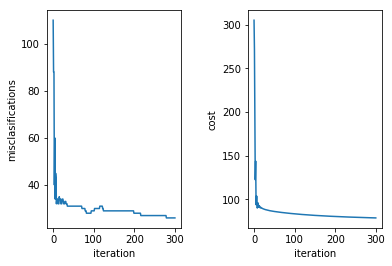

Missclassifications: [ 26.]


In [8]:
costs = find_softmax_costs(weights,g=softmax)
counts = find_all_counts(weights)
plot_two(counts,costs)
print("Missclassifications: {}".format(min(counts)))

#### Results for relegation:

In [9]:
x = relegation[:,:-1]
y = relegation[:,-1:]

In [10]:
w=np.asarray([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
weights = gradient_descent(g=softmax,alpha = .00001 ,max_its = 200,w = w,beta=0.75,version="unnormalized")

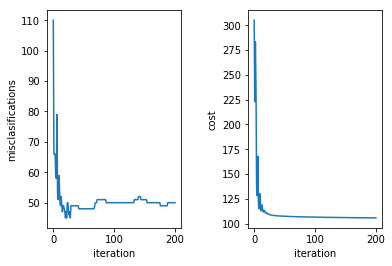

Missclassifications: [ 45.]


In [11]:
costs = find_softmax_costs(weights,g=softmax)
counts = find_all_counts(weights)
plot_two(counts,costs)
print("Missclassifications: {}".format(min(counts)))

## Conclusion:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After repeatedly tuning gradiet descent for each data set, I got 17 missclassifications for the winner, 26 for top four, and 45 for relegation. That translates to 96%, 94%, and 89% accuracy respectively in classifying the right placement. A reason why the winner might perform the best is that it is easier to predict the winner if they have a certain threshold amount of points and/or wins, and usually the team that performs the best at the midway of the season usually wins the title. Top four and relegation are harder to predict because there are more places to predict and there are smaller point separations for getting into the top four or being relegated. For example, the premier league winner usually wins by a large amount of points (around ten), but getting into top four or being relegated often comes down to being decided by five points or less. More confounding variables exist such as injuries, team morale, specific games(rivalries) and others during the midway point of the season. Tuning the momentum helped gain less classifications, and making the step size very small prevented the cost function plot from having many peaks. Also, using normalized gradient descent got worse results, which leads me to believe that the cost function contours were not extremely narrow. Overall, it is pleasing to get good results from using classification, and it will be interesting to test my model against the current 2017/18 and compare it to the end of the season.